<a href="https://colab.research.google.com/github/Ailla19/Mendoza_CSST104-3A/blob/main/3A_MENDOZA_MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Data Cleaning and Preparation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/googleplaystore.csv')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Reviews'] = df['Reviews'].astype(int)


In [ ]:
df['Size'] = df['Size'].replace('Varies with device', pd.NA)
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


In [ ]:
df['Installs'] = df['Installs'].astype(str)

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

df['Price'] = df['Price'].str.replace('$', '').astype(float)


# ***2. Exploratory Data Analysis (EDA)***

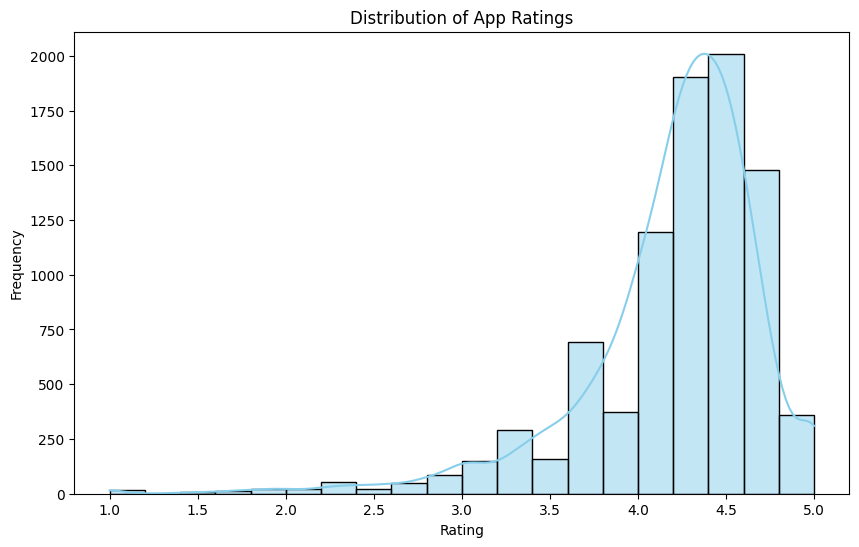

Descriptive Statistics for App Ratings:
count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

rating_stats = df['Rating'].describe()
print("Descriptive Statistics for App Ratings:")
print(rating_stats)

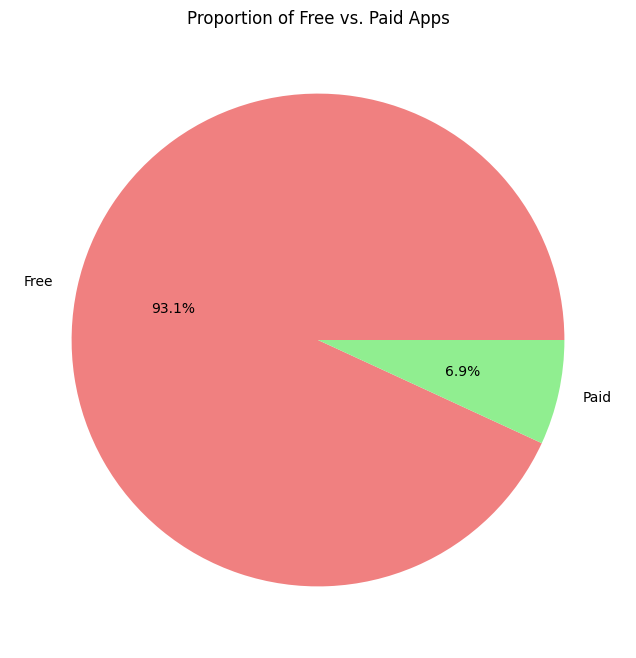


Percentage of Free vs. Paid Apps:
Type
Free    93.124015
Paid     6.875985
Name: count, dtype: float64


<ipython-input-28-b3d396b8aa50>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


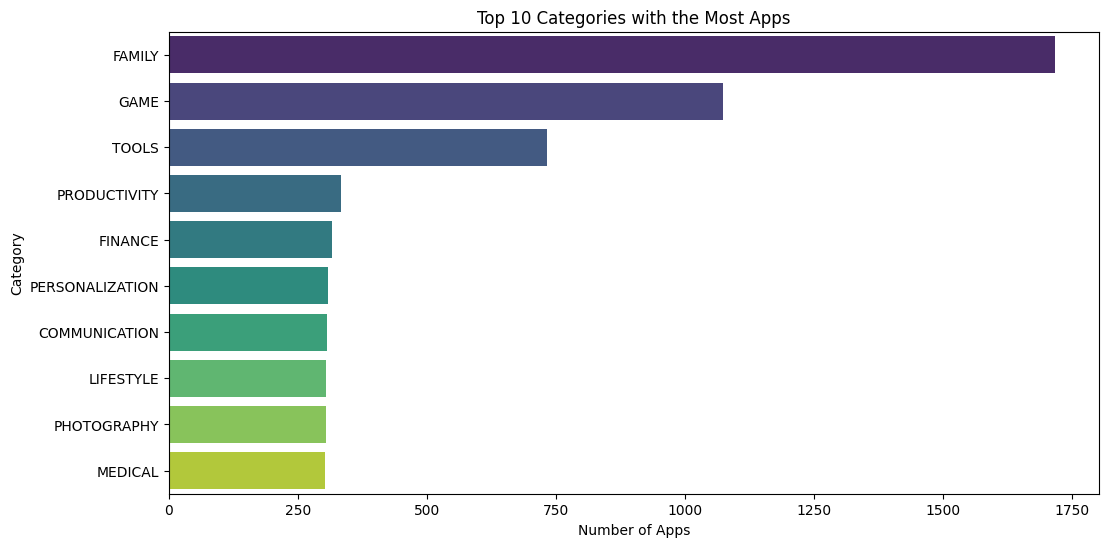


Top 5 Categories with the Most Apps:
Category
FAMILY          1717
GAME            1074
TOOLS            733
PRODUCTIVITY     334
FINANCE          317
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 8))
type_counts = df['Type'].value_counts()
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Free vs. Paid Apps')
plt.ylabel('')
plt.show()

type_percentages = (type_counts / len(df)) * 100
print("\nPercentage of Free vs. Paid Apps:")
print(type_percentages)

plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categories with the Most Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

top_categories = df['Category'].value_counts().nlargest(5)
print("\nTop 5 Categories with the Most Apps:")
print(top_categories)

# ***3. Category Analysis***

<ipython-input-29-270088746d22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values, palette='coolwarm')


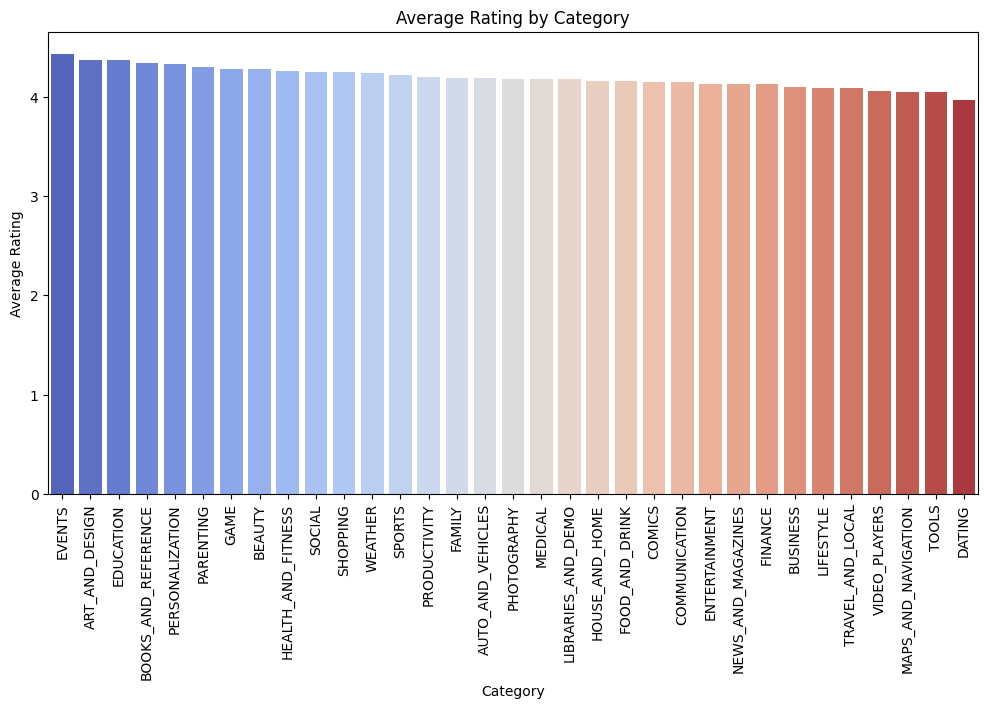

In [ ]:
avg_rating_per_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values, palette='coolwarm')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

<ipython-input-30-35e57f975c4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_reviews_per_category.index, y=total_reviews_per_category.values, palette='muted')


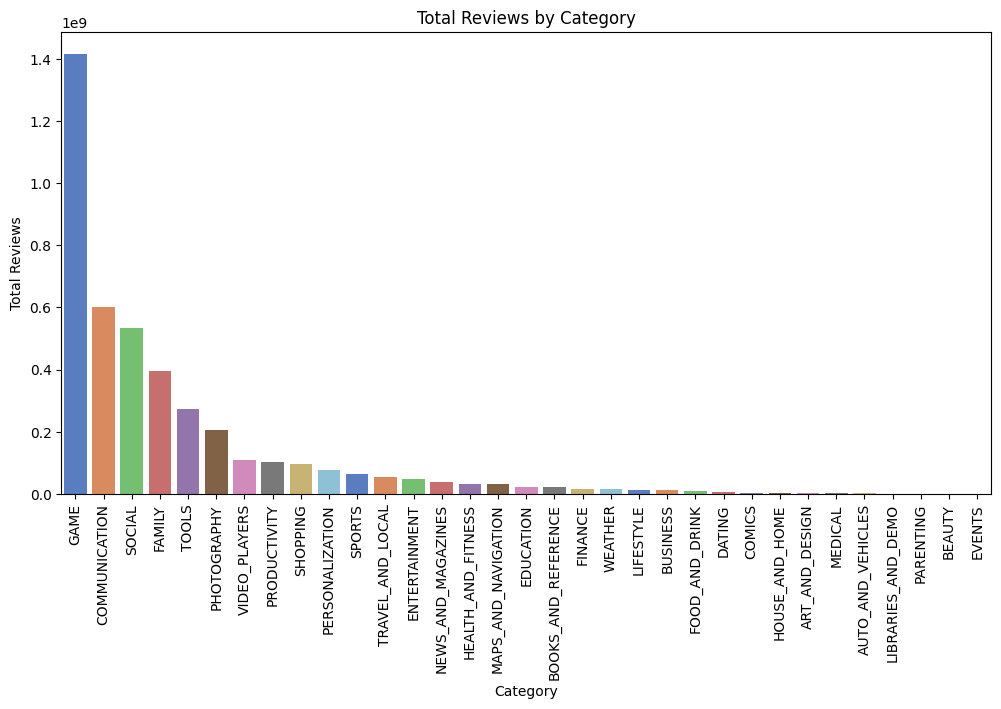

In [ ]:
total_reviews_per_category = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=total_reviews_per_category.index, y=total_reviews_per_category.values, palette='muted')
plt.title('Total Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Total Reviews')
plt.xticks(rotation=90)
plt.show()


<ipython-input-31-bdf566c53f8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=apps_per_category.index, y=apps_per_category.values, palette='pastel')


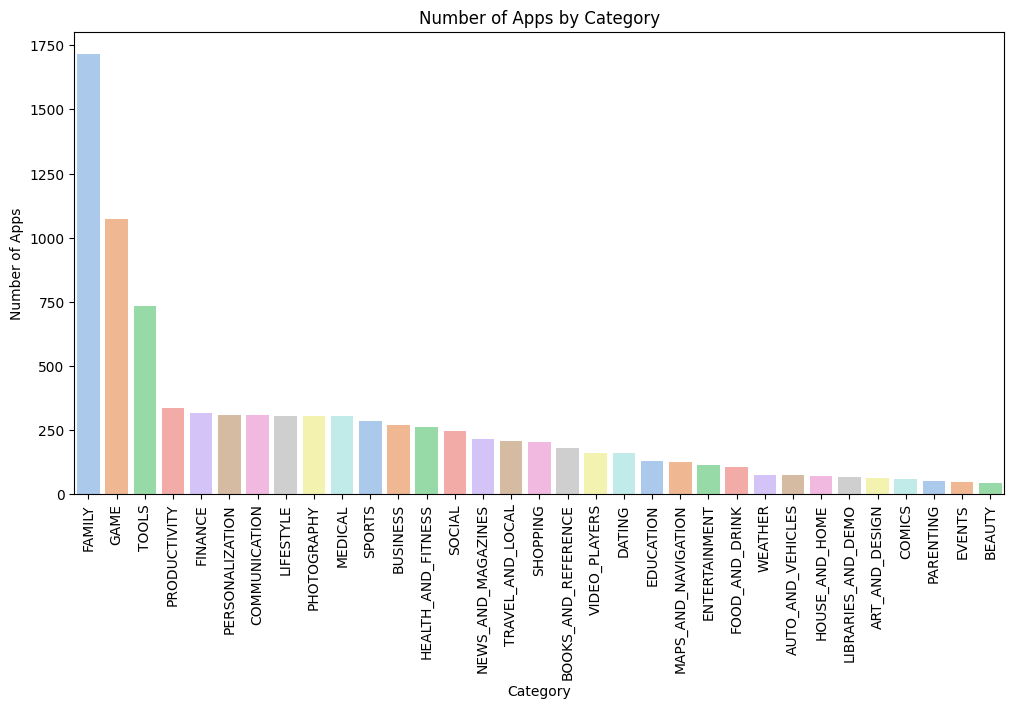

In [ ]:
apps_per_category = df['Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=apps_per_category.index, y=apps_per_category.values, palette='pastel')
plt.title('Number of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

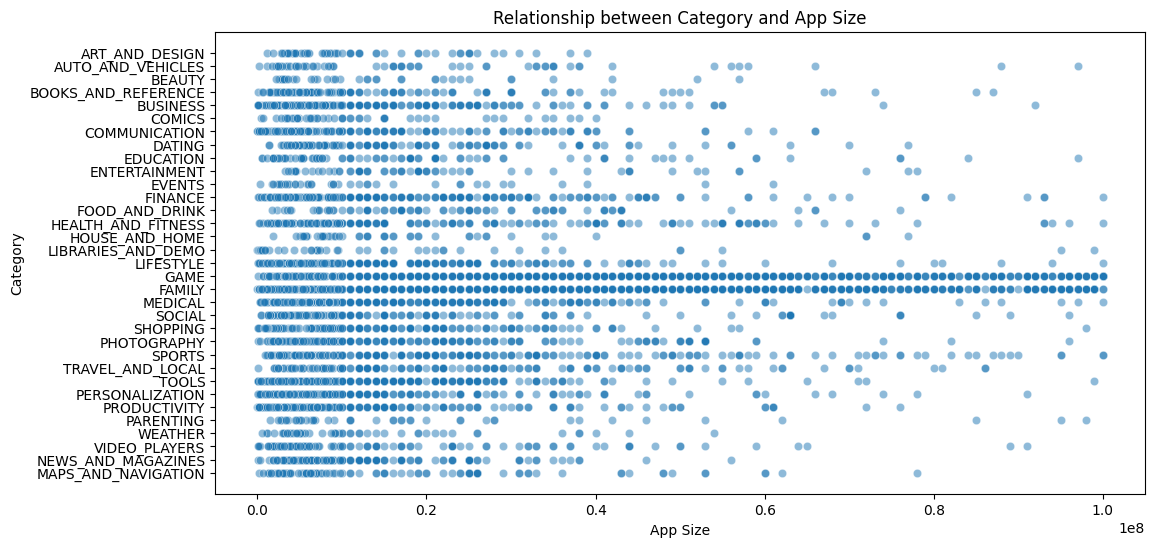

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Category', data=df, alpha=0.5)
plt.title('Relationship between Category and App Size')
plt.xlabel('App Size')
plt.ylabel('Category')
plt.show()

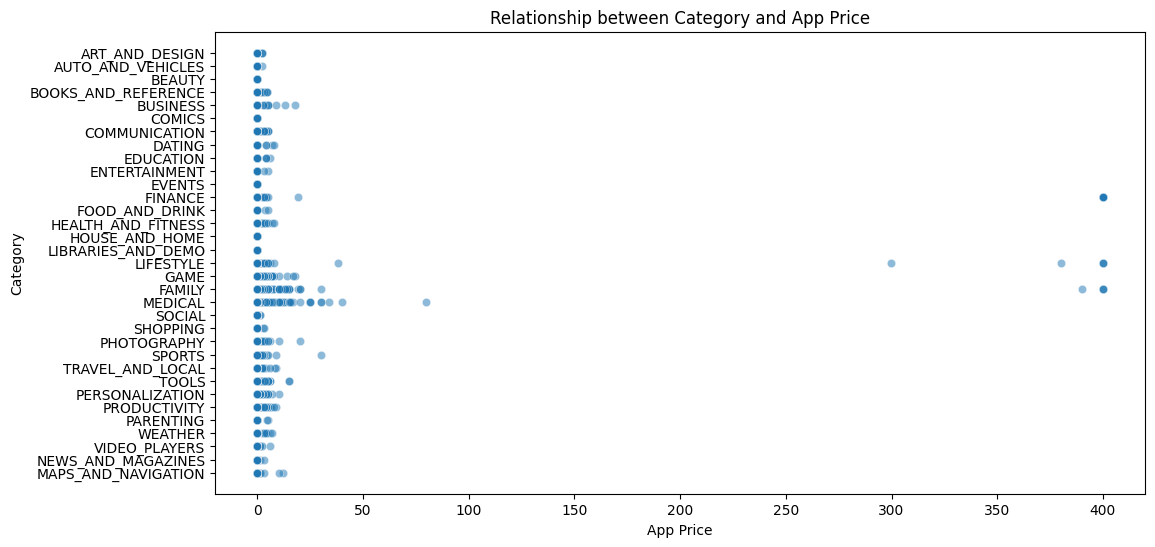

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Category', data=df, alpha=0.5)
plt.title('Relationship between Category and App Price')
plt.xlabel('App Price')
plt.ylabel('Category')
plt.show()

# ***4. Rating Prediction Model***

In [ ]:
df.dropna(inplace=True)
X = df[['Reviews', 'Size', 'Installs', 'Price',
        'Type_Free_True', 'Type_Paid_True',
        'Content Rating_Everyone_True', 'Content Rating_Teen_True', 'Content Rating_Mature 17+_True']]
y = df['Rating']







In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.312793096261966
Root Mean Squared Error: 0.5592790862011255
R-squared: 0.010087112703236922


# ***5. Trend Analysis***

In [ ]:
columns_to_check = ['Current Ver', 'Android Ver']

for column in columns_to_check:
    try:
        df[column] = pd.to_numeric(df[column])
    except (TypeError, ValueError):
        print(f"Column '{column}' cannot be converted to numeric.")

Column 'Current Ver' cannot be converted to numeric.
Column 'Android Ver' cannot be converted to numeric.


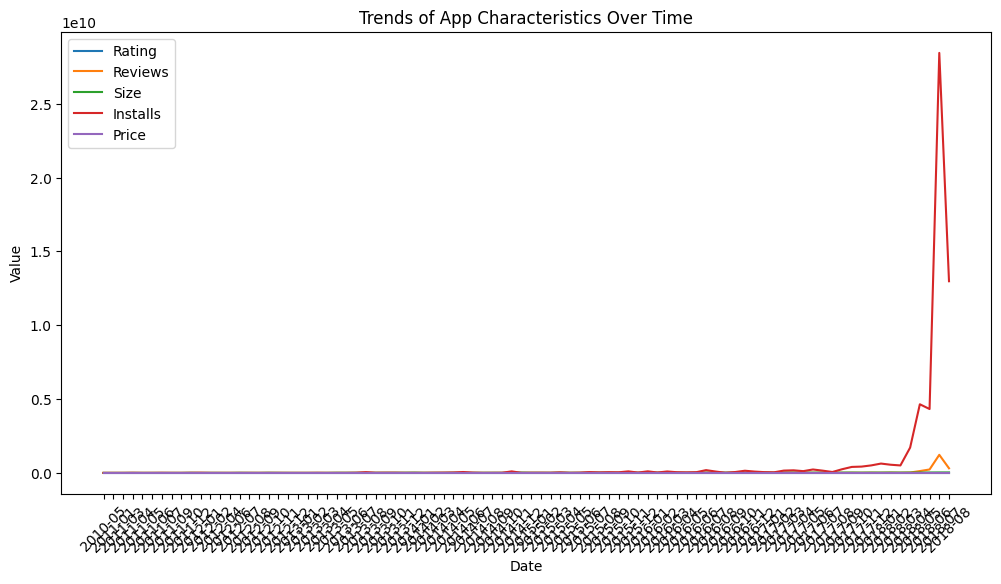

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df.dropna(subset=['Last Updated'], inplace=True)
columns_for_analysis = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']


df_time = df.groupby(df['Last Updated'].dt.to_period('M')).agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Size': 'mean',  # Include 'Size' column in aggregation
    'Installs': 'sum',
    'Price': 'mean'
}).reset_index()

for column in columns_for_analysis:
    try:
        pd.to_numeric(df_time[column])
    except TypeError:
        print(f"Column '{column}' cannot be converted to numeric.")

plt.figure(figsize=(12, 6))
for column in columns_for_analysis:
    sns.lineplot(data=df_time, x=df_time['Last Updated'].dt.strftime('%Y-%m'), y=column, label=column)
plt.title('Trends of App Characteristics Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ***6. Impact of Reviews on Ratings***

Correlation Coefficient between Reviews and Rating: 0.08045644958731642


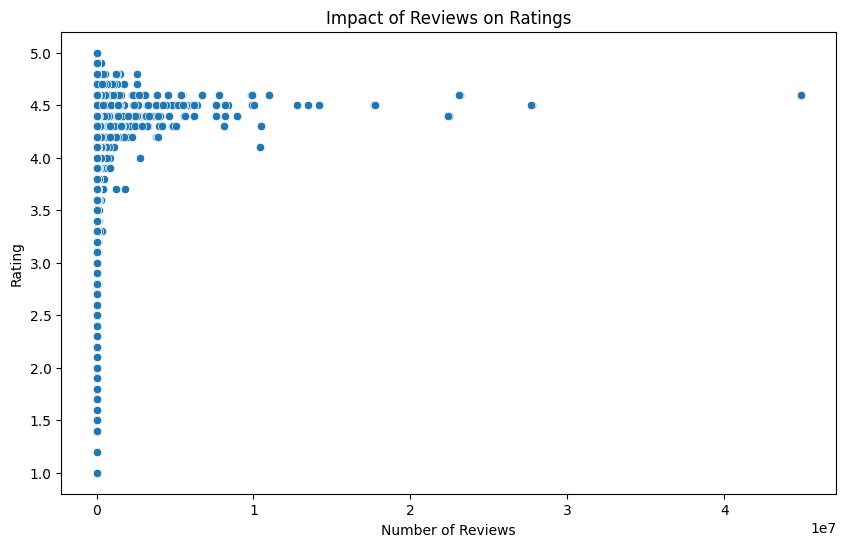

In [ ]:
columns_for_analysis = ['Reviews', 'Rating']

correlation_coefficient = df['Reviews'].corr(df['Rating'])
print(f"Correlation Coefficient between Reviews and Rating: {correlation_coefficient}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Rating')
plt.title('Impact of Reviews on Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()